# Binary Image Classifier | Sad-Neutral

This aim of this project is to train deep learning models using the TensorFlow framework for the purpose of binary image classification for facial emotion recognition. The images used to train the models were retrieved from the __FER2013 dataset__ and the deep learning architecture used to build the models is __Convolutional Neural Network__. Seven different models were trained with a varying number of layers.
The emotions used on this image classifier are __sad__ and __neutral__. 

In [1]:
import tensorflow as tf
import os

import cv2
import imghdr
import pandas
import pathlib

import numpy as np
import PIL
from matplotlib import pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [4]:
data_dir = "data/train"
os.listdir(data_dir)

['sad', 'neutral']

In [8]:
#Data count

data_path = pathlib.Path(data_dir)

image_count = len(list(data_path.glob('*/*.jpg')))
sad_image_count = len(list(data_path.glob('Sad/*.jpg')))
neutral_image_count = len(list(data_path.glob('neutral/*.jpg')))
print("Sad: ", sad_image_count, "|", "Neutral: ", neutral_image_count)

Sad:  4830 | Neutral:  4965


In [9]:
print("Total number of training images: ", image_count)

Total number of training images:  9795


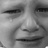

In [14]:
sad = list(data_path.glob('sad/*'))
PIL.Image.open(str(sad[2]))

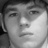

In [11]:
neutral = list(data_path.glob('neutral/*'))
PIL.Image.open(str(neutral[1]))

### Load Data

In [15]:
data = tf.keras.utils.image_dataset_from_directory(data_dir, batch_size=16)

Found 9795 files belonging to 2 classes.


2023-04-26 18:57:57.520550: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
data_iterator = data.as_numpy_iterator()

In [17]:
batch = data_iterator.next()

In [18]:
batch[0].shape

(16, 256, 256, 3)

In [19]:
class_names = data.class_names
print(class_names)

['neutral', 'sad']


### Data Visualisation

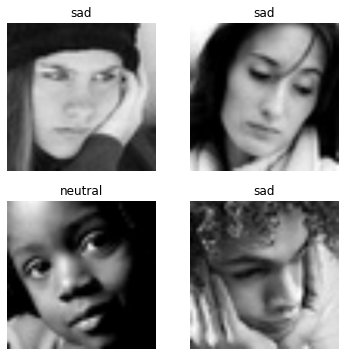

In [20]:
plt.figure(figsize=(6, 6))
for images, labels in data.take(1):
  for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


### Scaling the data

In [21]:
data = data.map(lambda x,y: (x/255, y))

In [22]:
batchh = data.as_numpy_iterator().next()

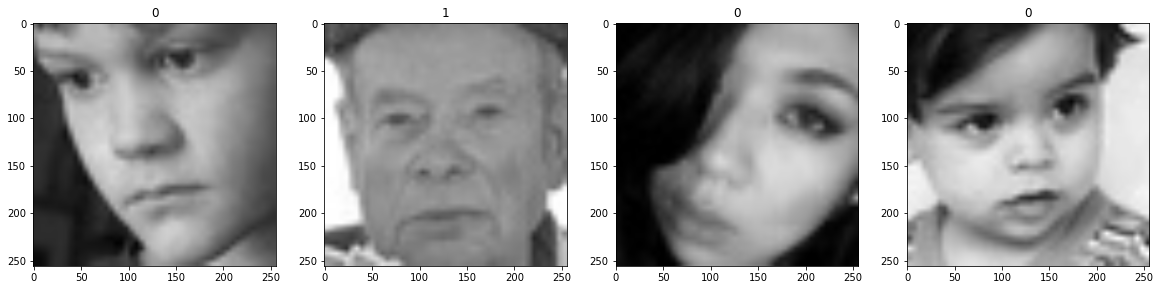

In [23]:
# Visualising the scaled data

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batchh[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])
    

### Splitting the data

In [24]:
# number of batches
len(data)

613

In [33]:
train_size = int(len(data)*.8) # 80% of data for training
val_size = int(len(data)*.2)+1 # 20% of data for validation

In [34]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)

In [35]:
len(train)

490

In [36]:
len(val)

123

### Building the deep learning model

#### 2 Layers

In [41]:
mod_2 = Sequential()

mod_2.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
mod_2.add(MaxPooling2D())

mod_2.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_2.add(MaxPooling2D())

mod_2.add(Flatten())

mod_2.add(Dense(256, activation='relu'))
mod_2.add(Dense(1, activation='sigmoid'))

In [42]:
mod_2.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [43]:
mod_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 123008)            0         
                                                                 
 dense_4 (Dense)             (None, 256)              

#### 3 Layers

In [44]:
mod_3 = Sequential()

mod_3.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
mod_3.add(MaxPooling2D())

mod_3.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_3.add(MaxPooling2D())

mod_3.add(Conv2D(16, (3,3), 1, activation='relu'))
mod_3.add(MaxPooling2D())

mod_3.add(Flatten())

mod_3.add(Dense(256, activation='relu'))
mod_3.add(Dense(1, activation='sigmoid'))

In [45]:
mod_3.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [46]:
mod_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 30, 30, 16)      

#### 4 Layers

In [47]:
mod_4 = Sequential()

mod_4.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
mod_4.add(MaxPooling2D())

mod_4.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_4.add(MaxPooling2D())

mod_4.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_4.add(MaxPooling2D())

mod_4.add(Conv2D(16, (3,3), 1, activation='relu'))
mod_4.add(MaxPooling2D())

mod_4.add(Flatten())

mod_4.add(Dense(256, activation='relu'))
mod_4.add(Dense(1, activation='sigmoid'))

In [48]:
mod_4.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [49]:
mod_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 30, 30, 32)      

#### 5 Layers

In [50]:
mod_5 = Sequential()

mod_5.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
mod_5.add(MaxPooling2D())

mod_5.add(Conv2D(16, (3,3), 1, activation='relu'))
mod_5.add(MaxPooling2D())

mod_5.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_5.add(MaxPooling2D())

mod_5.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_5.add(MaxPooling2D())

mod_5.add(Conv2D(16, (3,3), 1, activation='relu'))
mod_5.add(MaxPooling2D())

mod_5.add(Flatten())

mod_5.add(Dense(256, activation='relu'))
mod_5.add(Dense(1, activation='sigmoid'))

In [51]:
mod_5.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [52]:
mod_5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 125, 125, 16)      2320      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 62, 62, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 60, 60, 32)        4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 30, 30, 32)      

#### Training the model

In [54]:
logdir='logs'

In [55]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [56]:
hist_2 = mod_2.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
490/490 [==============================] - 231s 469ms/step - loss: 0.7909 - accuracy: 0.5661 - val_loss: 0.6672 - val_accuracy: 0.6077
Epoch 2/20
490/490 [==============================] - 222s 452ms/step - loss: 0.6659 - accuracy: 0.6098 - val_loss: 0.6873 - val_accuracy: 0.5678
Epoch 3/20
490/490 [==============================] - 203s 415ms/step - loss: 0.6425 - accuracy: 0.6418 - val_loss: 0.6564 - val_accuracy: 0.6153
Epoch 4/20
490/490 [==============================] - 204s 416ms/step - loss: 0.5925 - accuracy: 0.6814 - val_loss: 0.6685 - val_accuracy: 0.6353
Epoch 5/20
490/490 [==============================] - 189s 386ms/step - loss: 0.5061 - accuracy: 0.7452 - val_loss: 0.7331 - val_accuracy: 0.6358
Epoch 6/20
490/490 [==============================] - 189s 386ms/step - loss: 0.3736 - accuracy: 0.8288 - val_loss: 0.7992 - val_accuracy: 0.6455
Epoch 7/20
490/490 [==============================] - 180s 368ms/step - loss: 0.2117 - accuracy: 0.9175 - val_loss: 1.1223 -

In [57]:
hist_3 = mod_3.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
490/490 [==============================] - 138s 280ms/step - loss: 0.6833 - accuracy: 0.5718 - val_loss: 0.6545 - val_accuracy: 0.6286
Epoch 2/20
490/490 [==============================] - 130s 265ms/step - loss: 0.6422 - accuracy: 0.6315 - val_loss: 0.6529 - val_accuracy: 0.6246
Epoch 3/20
490/490 [==============================] - 128s 261ms/step - loss: 0.6046 - accuracy: 0.6732 - val_loss: 0.6617 - val_accuracy: 0.6210
Epoch 4/20
490/490 [==============================] - 128s 262ms/step - loss: 0.5325 - accuracy: 0.7342 - val_loss: 0.7404 - val_accuracy: 0.6414
Epoch 5/20
490/490 [==============================] - 129s 263ms/step - loss: 0.3806 - accuracy: 0.8251 - val_loss: 1.0138 - val_accuracy: 0.6317
Epoch 6/20
490/490 [==============================] - 132s 270ms/step - loss: 0.2133 - accuracy: 0.9131 - val_loss: 1.3922 - val_accuracy: 0.6358
Epoch 7/20
490/490 [==============================] - 130s 265ms/step - loss: 0.1133 - accuracy: 0.9615 - val_loss: 1.6506 -

In [58]:
hist_4 = mod_4.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
490/490 [==============================] - 158s 322ms/step - loss: 0.6843 - accuracy: 0.5552 - val_loss: 0.6631 - val_accuracy: 0.6087
Epoch 2/20
490/490 [==============================] - 180s 368ms/step - loss: 0.6455 - accuracy: 0.6338 - val_loss: 0.6414 - val_accuracy: 0.6425
Epoch 3/20
490/490 [==============================] - 179s 365ms/step - loss: 0.6131 - accuracy: 0.6677 - val_loss: 0.6399 - val_accuracy: 0.6598
Epoch 4/20
490/490 [==============================] - 174s 356ms/step - loss: 0.5755 - accuracy: 0.6996 - val_loss: 0.6390 - val_accuracy: 0.6629
Epoch 5/20
490/490 [==============================] - 163s 332ms/step - loss: 0.5097 - accuracy: 0.7434 - val_loss: 0.6820 - val_accuracy: 0.6726
Epoch 6/20
490/490 [==============================] - 146s 299ms/step - loss: 0.3796 - accuracy: 0.8325 - val_loss: 0.8461 - val_accuracy: 0.6583
Epoch 7/20
490/490 [==============================] - 144s 293ms/step - loss: 0.2352 - accuracy: 0.9027 - val_loss: 1.1184 -

In [59]:
hist_5 = mod_5.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
490/490 [==============================] - 135s 274ms/step - loss: 0.6816 - accuracy: 0.5661 - val_loss: 0.6794 - val_accuracy: 0.5887
Epoch 2/20
490/490 [==============================] - 125s 256ms/step - loss: 0.6513 - accuracy: 0.6210 - val_loss: 0.6837 - val_accuracy: 0.6113
Epoch 3/20
490/490 [==============================] - 124s 253ms/step - loss: 0.6365 - accuracy: 0.6422 - val_loss: 0.6431 - val_accuracy: 0.6404
Epoch 4/20
490/490 [==============================] - 124s 253ms/step - loss: 0.6138 - accuracy: 0.6677 - val_loss: 0.6417 - val_accuracy: 0.6645
Epoch 5/20
490/490 [==============================] - 124s 253ms/step - loss: 0.5909 - accuracy: 0.6842 - val_loss: 0.6572 - val_accuracy: 0.6384
Epoch 6/20
490/490 [==============================] - 124s 254ms/step - loss: 0.5548 - accuracy: 0.7140 - val_loss: 0.6615 - val_accuracy: 0.6455
Epoch 7/20
490/490 [==============================] - 124s 253ms/step - loss: 0.5092 - accuracy: 0.7476 - val_loss: 0.6727 -

### Checking Model Performance

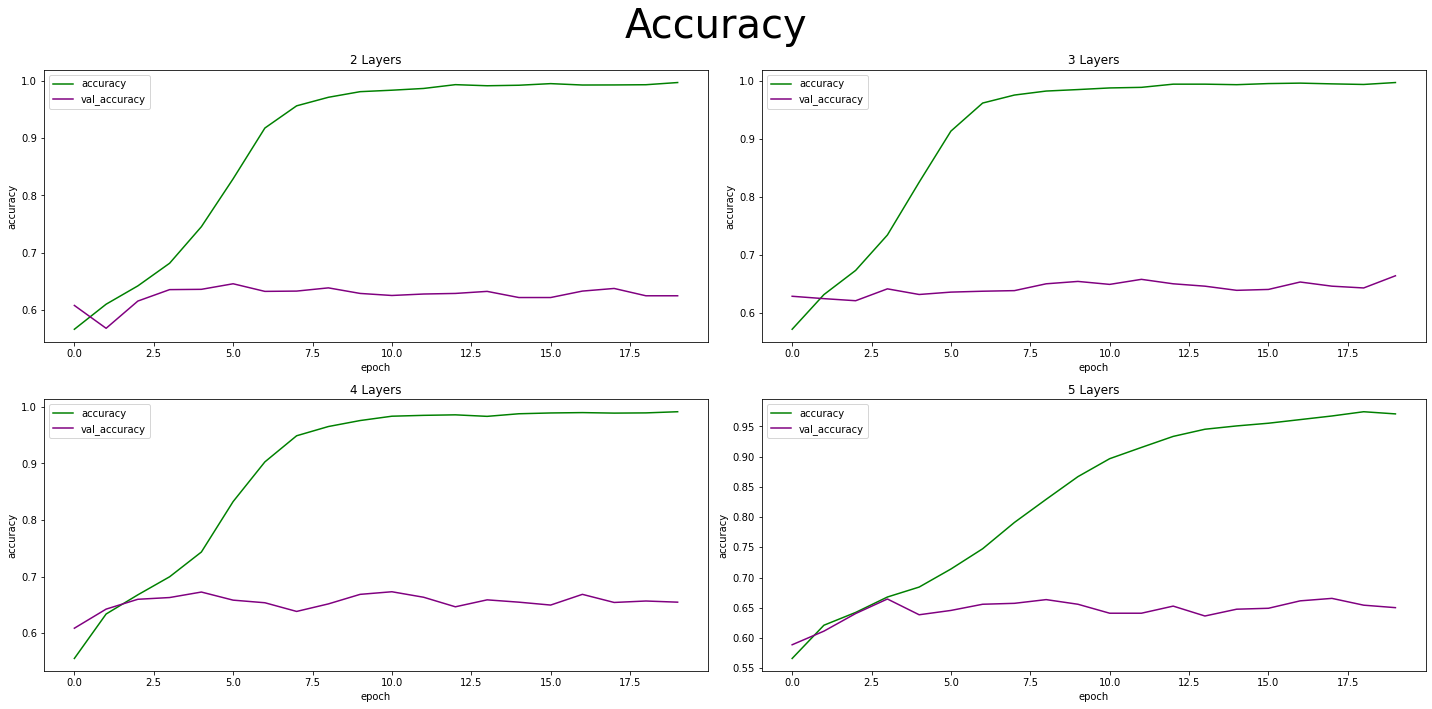

In [60]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle('Accuracy', fontsize=40)
axs[0, 0].plot(hist_2.history['accuracy'], color='green', label='accuracy')
axs[0, 0].plot(hist_2.history['val_accuracy'], color='purple', label='val_accuracy')
axs[0, 0].legend(loc="upper left")
axs[0, 0].set_title('2 Layers')
axs[0, 1].plot(hist_3.history['accuracy'], color='green', label='accuracy')
axs[0, 1].plot(hist_3.history['val_accuracy'], color='purple', label='val_accuracy')
axs[0, 1].legend(loc="upper left")
axs[0, 1].set_title('3 Layers')
axs[1, 0].plot(hist_4.history['accuracy'], color='green', label='accuracy')
axs[1, 0].plot(hist_4.history['val_accuracy'], color='purple', label='val_accuracy')
axs[1, 0].legend(loc="upper left")
axs[1, 0].set_title('4 Layers')
axs[1, 1].plot(hist_5.history['accuracy'], color='green', label='accuracy')
axs[1, 1].plot(hist_5.history['val_accuracy'], color='purple', label='val_accuracy')
axs[1, 1].legend(loc="upper left")
axs[1, 1].set_title('5 Layers')

for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='accuracy')


fig.tight_layout()


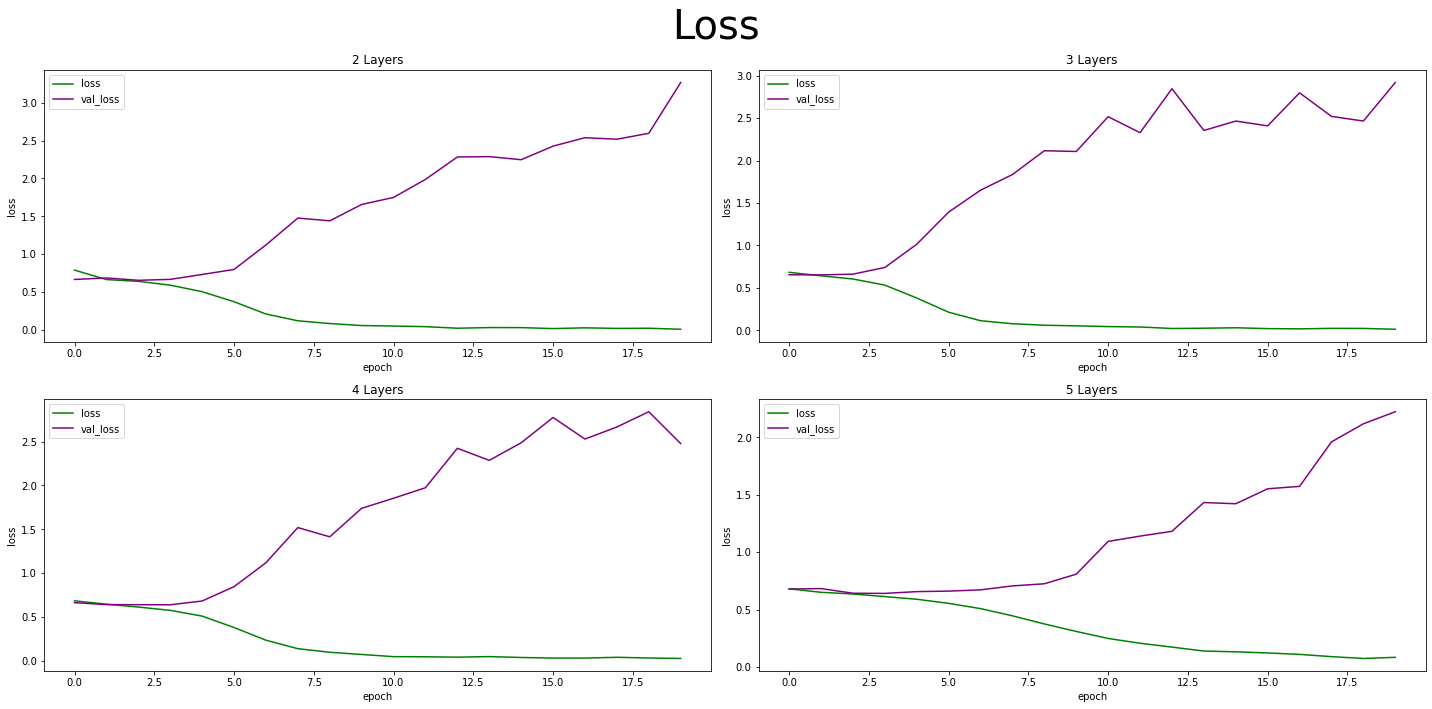

In [61]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle('Loss', fontsize=40)
axs[0, 0].plot(hist_2.history['loss'], color='green', label='loss')
axs[0, 0].plot(hist_2.history['val_loss'], color='purple', label='val_loss')
axs[0, 0].legend(loc="upper left")
axs[0, 0].set_title('2 Layers')
axs[0, 1].plot(hist_3.history['loss'], color='green', label='loss')
axs[0, 1].plot(hist_3.history['val_loss'], color='purple', label='val_loss')
axs[0, 1].legend(loc="upper left")
axs[0, 1].set_title('3 Layers')
axs[1, 0].plot(hist_4.history['loss'], color='green', label='loss')
axs[1, 0].plot(hist_4.history['val_loss'], color='purple', label='val_loss')
axs[1, 0].legend(loc="upper left")
axs[1, 0].set_title('4 Layers')
axs[1, 1].plot(hist_5.history['loss'], color='green', label='loss')
axs[1, 1].plot(hist_5.history['val_loss'], color='purple', label='val_loss')
axs[1, 1].legend(loc="upper left")
axs[1, 1].set_title('5 Layers')

for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='loss')


fig.tight_layout()

### Adding a dropout layer

In [102]:
mod_5d = Sequential()

mod_5d.add(data_augmentation)

mod_5d.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
mod_5d.add(MaxPooling2D())

mod_5d.add(Conv2D(16, (3,3), 1, activation='relu'))
mod_5d.add(MaxPooling2D())

mod_5d.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_5d.add(MaxPooling2D())

mod_5d.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_5d.add(MaxPooling2D())

mod_5d.add(Conv2D(16, (3,3), 1, activation='relu'))
mod_5d.add(MaxPooling2D())

mod_5d.add(Dropout(0.2))

mod_5d.add(Flatten())

mod_5d.add(Dense(256, activation='relu'))
mod_5d.add(Dense(1, activation='sigmoid'))

In [103]:
mod_5d.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [104]:
mod_5d.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_19 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 125, 125, 16)      2320      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 62, 62, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 60, 60, 32)       

In [105]:
hist_5d = mod_5d.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
490/490 [==============================] - 148s 294ms/step - loss: 0.6935 - accuracy: 0.5024 - val_loss: 0.6942 - val_accuracy: 0.4921
Epoch 2/20
490/490 [==============================] - 142s 289ms/step - loss: 0.6935 - accuracy: 0.5040 - val_loss: 0.6879 - val_accuracy: 0.5361
Epoch 3/20
490/490 [==============================] - 143s 292ms/step - loss: 0.6851 - accuracy: 0.5579 - val_loss: 0.6712 - val_accuracy: 0.5836
Epoch 4/20
490/490 [==============================] - 142s 290ms/step - loss: 0.6764 - accuracy: 0.5703 - val_loss: 0.6746 - val_accuracy: 0.5785
Epoch 5/20
490/490 [==============================] - 142s 289ms/step - loss: 0.6705 - accuracy: 0.5876 - val_loss: 0.6645 - val_accuracy: 0.5969
Epoch 6/20
490/490 [==============================] - 142s 290ms/step - loss: 0.6674 - accuracy: 0.5943 - val_loss: 0.6552 - val_accuracy: 0.6220
Epoch 7/20
490/490 [==============================] - 141s 287ms/step - loss: 0.6602 - accuracy: 0.5948 - val_loss: 0.6566 -

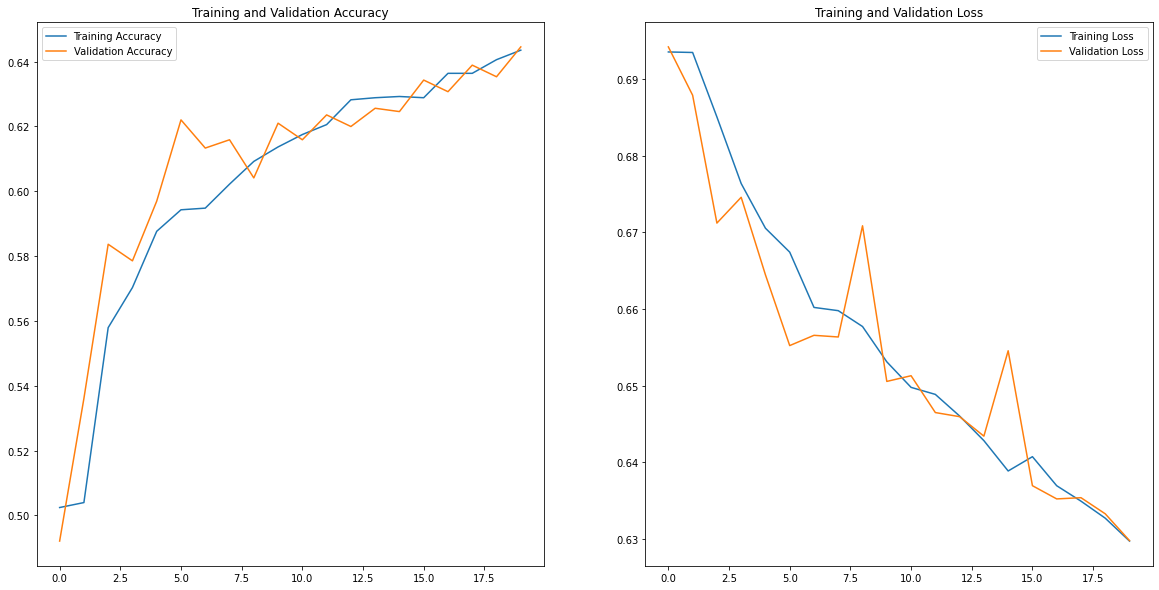

In [146]:
acc = hist_5d.history['accuracy']
val_acc = hist_5d.history['val_accuracy']

loss = hist_5d.history['loss']
val_loss = hist_5d.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


### Evaluating the model

In [62]:
import pandas as pd

from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [63]:
test_dir = 'data/test'

In [106]:
test = tf.keras.utils.image_dataset_from_directory(test_dir, batch_size=827)

Found 2480 files belonging to 2 classes.


In [107]:
test_iterator = test.as_numpy_iterator()

In [108]:
test_batch = test_iterator.next()

In [109]:
test_batch[0].shape

(827, 256, 256, 3)

In [110]:
pre = Precision()
re = Recall()
biacc = BinaryAccuracy()

In [111]:
for test_batch in test.as_numpy_iterator(): 
    X, y = test_batch
    yhat = mod_5.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    biacc.update_state(y, yhat)

In [112]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{biacc.result().numpy()}')

Precision: 0.6359077095985413, Recall:0.5084202289581299, Accuracy:0.6064438223838806


In [113]:
yhat.shape

(826, 1)

In [114]:
yhat

array([[0.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [1.000000

In [115]:
yhat.shape

(826, 1)

In [116]:
y

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,

In [117]:
y.shape

(826,)

In [118]:
thresh = 0.5

yhat_binary = np.where(yhat > thresh, 1, 0)

In [119]:
yhat_binary

array([[0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [121]:
yy = yhat_binary.reshape(826)
yy.shape

(826,)

In [122]:
yy

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,

In [123]:
df = pandas.DataFrame({"True": y, "Pred": yy})
print(df)

     True  Pred
0       0     0
1       1     1
2       1     1
3       0     1
4       1     0
..    ...   ...
821     1     1
822     0     1
823     0     1
824     0     0
825     0     0

[826 rows x 2 columns]


In [124]:
cm = confusion_matrix(y, yy)

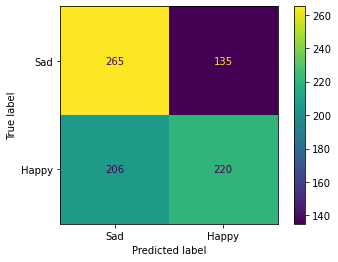

In [125]:
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Sad', 'Happy'])

cm_display.plot()
plt.show()

In [126]:
from sklearn.metrics import roc_curve, auc

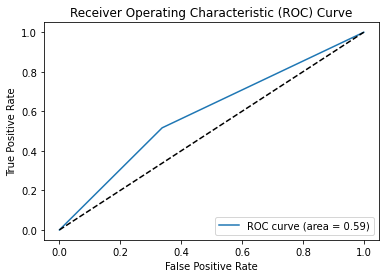

In [127]:
fpr, tpr, thresholds = roc_curve(y, yy)

# Computing the AUC score
roc_auc = auc(fpr, tpr)

#Plotting the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Image Prediction

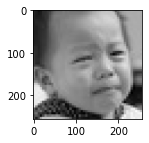

In [132]:
from tensorflow.keras.preprocessing import image

test_image = image.load_img('data/test/sad/PrivateTest_552501.jpg', target_size = (256,256))
plt.figure(figsize=(2, 2))
plt.imshow(test_image);

In [133]:
test_image = image.img_to_array(test_image)
test_image = test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = mod_5d.predict(test_image)
result

array([[0.46364245]], dtype=float32)

In [134]:
rr = result.reshape(1)
sad_conf = round(rr[0] * 100, 2)
neut_conf = round(100-(rr[0] * 100), 2)

print(f'Emotion prediction\n\nSad: {sad_conf}%\nNeutral: {neut_conf}%')

Emotion prediction

Sad: 46.36%
Neutral: 53.64%


In [144]:
if result < 0.5: 
    print(f'Predicted class is Neutral')
else:
    print(f'Predicted class is Sad')

Predicted class is Neutral


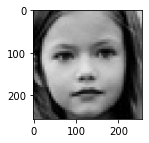

In [139]:
test_image2 = image.load_img('data/test/neutral/PrivateTest_6319489.jpg', target_size = (256,256))
plt.figure(figsize=(2, 2))
plt.imshow(test_image2);

In [140]:
test_image2 = image.img_to_array(test_image2)
test_image2 = test_image2/255
test_image2 = np.expand_dims(test_image2, axis = 0)
result2 = mod_5d.predict(test_image2)
result2

array([[0.3613794]], dtype=float32)

In [141]:
rr2 = result2.reshape(1)
sad_conf2 = round(rr2[0] * 100, 2)
neut_conf2 = round(100-(rr2[0] * 100), 2)

print(f'Emotion prediction\n\nSad: {sad_conf2}%\nNeutral: {neut_conf2}%')

Emotion prediction

Sad: 36.14%
Neutral: 63.86%


In [143]:
if result2 < 0.5: 
    print(f'Predicted class is Neutral')
else:
    print(f'Predicted class is Sad')

Predicted class is Neutral


## Conclusion

The sad-neutral classifier was trained on a balanced dataset. Initially the trained models were overfit but with the addition of a dropout layer, the model was able to achieve a good fit. The accuracy score was average at 60% and the predictions on the test images were wrong. This could be due to the fact that a sad expression can sometimes closely resemble a neutral one making it difficult to differentiate between the two emotions.